In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [21]:
pip install yahoofinancials 

     ---------------------------------------- 41.6/41.6 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for yahoofinancials: filename=yahoofinancials-1.16-py3-none-any.whl size=28777 sha256=cd4f1cd5dfddd1793904a66056c76ea6cd2c0d94144ab98a0cf69b4a3ce85592
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\eb\93\11\d46f4ad073d00185c0e16c53164f3c94c59a20bc7d1169e3c5
Successfully built yahoofinancials
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("C:\\Users\\User\\Documents\\GitHub\\Masther_Thesis\\tweets\\stock_market_tweets_predicted.csv")

In [12]:
df.head()

,Unnamed: 0.1,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,company,tweet,predictions
0,0,0,550441672312512512,KeralaGuy77,2015-01-01,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,Apple,Talking about Apple. Insanity of today weirdo ...,negative
1,1,1,550452877466935296,TheTrendIsUp,2015-01-01,My biggest winner in 2014: Inverse Volatility ...,1,0,0,AAPL,Apple,Talking about Apple. My biggest winner in 2014...,negative
2,2,2,550456665607122944,t_nathan95,2015-01-01,Had a down day of -.66%. Worst performer was A...,0,0,0,AAPL,Apple,Talking about Apple. Had a down day of -.66%. ...,negative
3,3,3,550459042787651584,petergo99037185,2015-01-01,"YR %, /-, Tesla 47.85%, Facebook 42.77%, $T...",0,0,0,AAPL,Apple,"Talking about Apple. YR %, /-, Tesla 47.85%,...",neutral
4,4,4,550461555423584257,t_nathan95,2015-01-01,Prediction: $TWTR $GRPN $YELP are acquired as ...,0,0,1,GOOG,Google,Talking about Google. Prediction: $TWTR $GRPN ...,neutral


In [11]:
# Define a mapping for the renaming
rename_mapping = {0: 'neutral', 1: 'positive', 2: 'negative'}

# Replace values in the 'prediction' column using the mapping
df['predictions'] = df['predictions'].replace(rename_mapping)

In [ ]:
# Convert 'post_date' column to datetime
df['post_date'] = pd.to_datetime(df['post_date'])

# Group by 'company' and 'post_date', then count the predictions and sum the total evaluations
grouped = df.groupby(['company', 'post_date']).agg({'predictions': 'count', 'post_date': 'count'}).rename(columns={'predictions': 'Daily Predictions', 'post_date': 'Total Evaluations'})

# Reset index to make 'company' and 'post_date' as columns
grouped.reset_index(inplace=True)

# Create a separate plot for each company
companies = df['company'].unique()
for company in companies:
    company_data = grouped[grouped['company'] == company]
    plt.figure(figsize=(10, 5))
    plt.plot(company_data['post_date'], company_data['Daily Predictions'], label='Daily Predictions')
    plt.plot(company_data['post_date'], company_data['Total Evaluations'], label='Total Evaluations')
    plt.title(f'Daily Predictions and Total Evaluations for {company}')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# Filter for positive predictions
positive_df = df[df['predictions'] == 'positive']

# Group by 'Company' and 'Date' to count daily positive predictions
daily_positive_counts = positive_df.groupby(['company', 'post_date']).size().reset_index(name='PositiveCount')

# Group by 'Company' and 'Date' to count total daily predictions
daily_total_counts = df.groupby(['company', 'post_date']).size().reset_index(name='TotalCount')

# Merge the two dataframes on 'Company' and 'Date'
combined_df = daily_positive_counts.merge(daily_total_counts, on=['company', 'post_date'], how='right')

# Calculate the daily positive percentage
combined_df['PositivePercentage'] = (combined_df['PositiveCount'] / combined_df['TotalCount']) * 100

# Create a separate graph for each company
companies = df['company'].unique()
for company in companies:
    company_data = combined_df[combined_df['company'] == company]
    plt.figure(figsize=(10, 5))
    plt.plot(company_data['post_date'], company_data['PositivePercentage'], label='Positive Percentage')
    plt.title(f'Daily Positive Percentage for {company}')
    plt.xlabel('Date')
    plt.ylabel('Positive Percentage (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

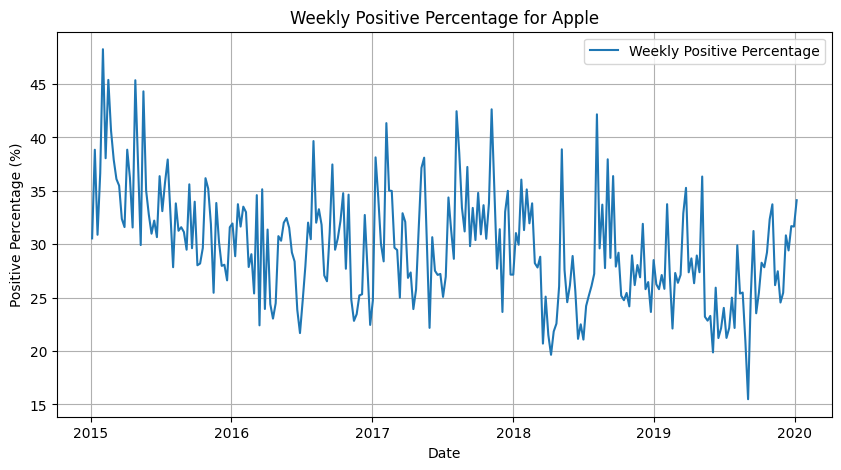

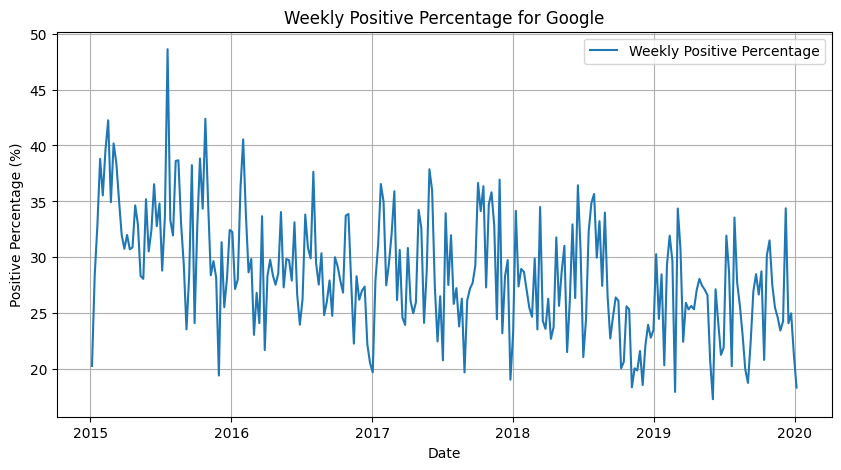

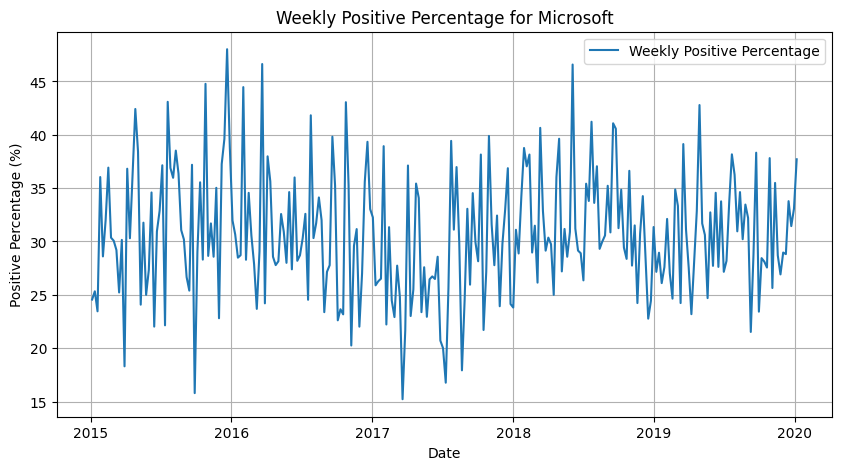

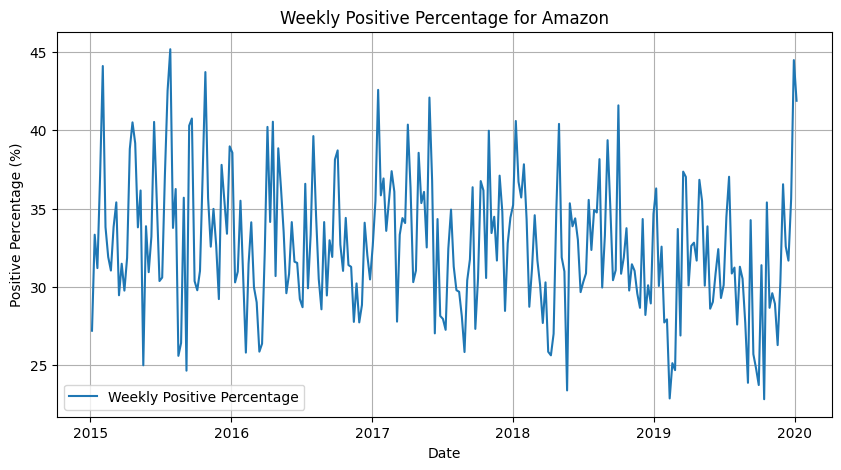

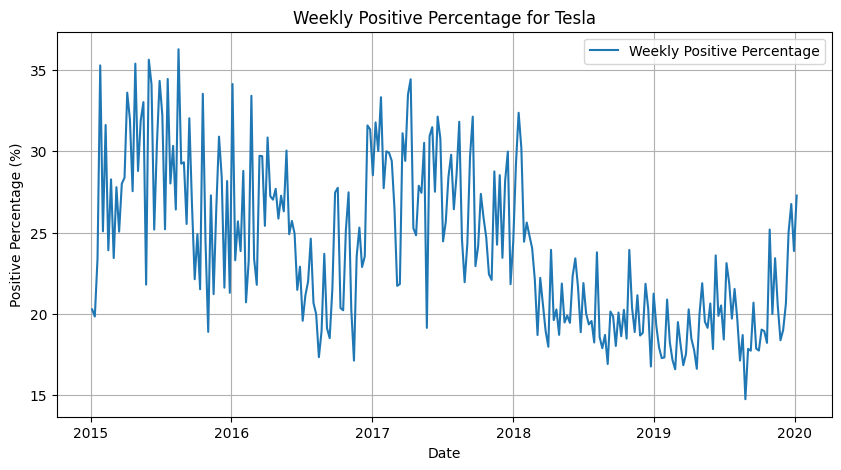

In [32]:
positive_df = df[df['predictions'] == 'positive']

weekly_positive_counts = (
    positive_df.groupby(['company', pd.Grouper(key='post_date', freq='W-MON')])['predictions']
    .count()
    .reset_index()
    .rename(columns={'predictions': 'PositiveCount'})
)

# Group by 'Company', 'Date', and 'week' to count weekly total predictions
weekly_total_counts = (
    df.groupby(['company', pd.Grouper(key='post_date', freq='W-MON')])['predictions']
    .count()
    .reset_index()
    .rename(columns={'predictions': 'TotalCount'})
)

# Merge the two dataframes on 'Company', 'Date', and 'week'
combined_df = pd.merge(weekly_positive_counts, weekly_total_counts, on=['company', 'post_date'], how='right')

# Calculate the weekly positive percentage
combined_df['PositivePercentage'] = (combined_df['PositiveCount'] / combined_df['TotalCount']) * 100

# Create a separate graph for each company
companies = df['company'].unique()
for company in companies:
    company_data = combined_df[combined_df['company'] == company]
    plt.figure(figsize=(10, 5))
    plt.plot(company_data['post_date'], company_data['PositivePercentage'], label='Weekly Positive Percentage')
    plt.title(f'Weekly Positive Percentage for {company}')
    plt.xlabel('Date')
    plt.ylabel('Positive Percentage (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
combined_df['PositiveCount']

In [25]:
pip install yfinance

     ---------------------------------------- 65.2/65.2 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB ? eta 0:00:00
     ------------------------------------- 928.0/928.0 kB 14.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.16.3-py3-none-any.whl size=135547 sha256=3d392d809d2b1a3a95a2d7a2e0d5b86211bdd2bb3da08fad899685d7d45e5fc8
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\eb\31\a5\684700b27651dbb25fc4c259f3764ce676ab65ff7f6ff59eb4
Successfully built peewee
  Attempting uninstall: requests
    Found existing

In [28]:
pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [ ]:
https://www.alphavantage.co/query?function=LISTING_STATUS&apikey=C44RMPSC3FTRRUS5

In [31]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Replace 'YOUR_API_KEY' with your Alpha Vantage API key
api_key = 'C44RMPSC3FTRRUS5'

# Define the ticker symbol for Apple
symbol = 'AAPL'

# Create an Alpha Vantage client
ts = TimeSeries(key=api_key, output_format='pandas')

# Retrieve quarterly earnings data for Apple
earnings_data, _ = ts.(symbol=symbol)

# Print the earnings data or save it to a CSV file
print(earnings_data)

AttributeError: 'TimeSeries' object has no attribute 'get_earnings'